In [361]:
import importlib

import CsvToExchangeData
import ExchangeData
import Regression
import Expremo

import matplotlib.pyplot as plt

importlib.reload(CsvToExchangeData)
importlib.reload(ExchangeData)
importlib.reload(Regression)
importlib.reload(Expremo)

<module 'Expremo' from 'C:\\Users\\Gaudium\\Desktop\\уник\\2КУРС\\4СЕМ\\ТПР\\курсач\\прог\\Expremo.py'>

In [362]:
nlmk_data = CsvToExchangeData.exchange_data_list_from_csv("Прошлые данные - NLMK.csv", ExchangeData.ExchangeDataType.Stock, "NLMK")
nlmk_data.reverse()
for stock in nlmk_data:
    # print(stock)
    pass

In [363]:
moex_data = CsvToExchangeData.exchange_data_list_from_csv("Прошлые данные - ММВБ – Индекс Мосбиржи.csv", ExchangeData.ExchangeDataType.Stock, "MOEX")
moex_data.reverse()
for index in moex_data:
    # print(index)
    pass

In [364]:
Regression.DEBUG = False
test_data = nlmk_data

time = [i+1 for i in range(len(nlmk_data))]
# time = [data.date.timestamp() for data in nlmk_data]
price = [float(nlmk_data[i].price) for i in range(len(nlmk_data))]

RegressionType.Power


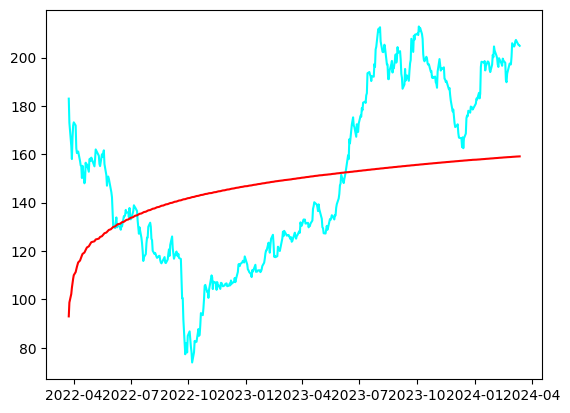

In [365]:
# nlmk_prediction = Regression.fit_best_regression(price, time)
prediction_func = Regression.fit_regression(price, time, Regression.RegressionType.Power)
prediction_set = [prediction_func(i) for i in time]

plt.plot([data.date for data in nlmk_data], price, color='cyan')
plt.plot([data.date for data in nlmk_data], prediction_set, color='red')
# plt.gca().invert_xaxis()
# plt.show()
print(Regression.get_best_regression_type(time, price))
# print(prediction_set)

RegressionType.Quadratic


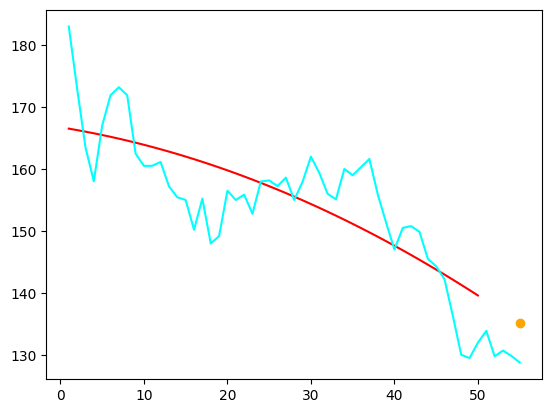

In [366]:
predictor = Expremo.Expremo(price, time)
predictor.set_regression_type(Regression.get_best_regression_type(price, time))

prediction = predictor.predict(0, 50, 5)
print(predictor)
print(predictor.regression_type)

plt.plot(time[0:50],
         [predictor.get_regression_func()(i) for i in time[0:50]],
         color='red')

plt.scatter(55, prediction, color='orange')

plt.plot(time[0:55], 
         price[0:55], 
         color='cyan')

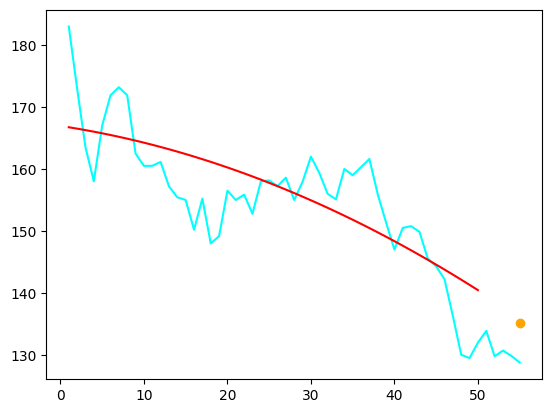

In [367]:
Expremo.plot_prediction(predictor, 5)

In [368]:
step = 20
prediction_distance = 3
regression_type = None  # None for best type

Point: 0, RegressionType.Exponential
Point: 20, RegressionType.Exponential
Point: 40, RegressionType.Exponential
Point: 60, RegressionType.Exponential
Point: 80, RegressionType.Exponential
Point: 100, RegressionType.Exponential
Point: 120, RegressionType.Exponential
Point: 140, RegressionType.Exponential
Point: 160, RegressionType.Exponential
Point: 180, RegressionType.Exponential
Point: 200, RegressionType.Exponential
Point: 220, RegressionType.Exponential
Point: 240, RegressionType.Exponential
Point: 260, RegressionType.Exponential
Point: 280, RegressionType.Exponential
Point: 300, RegressionType.Exponential
Point: 320, RegressionType.Exponential
Point: 340, RegressionType.Exponential
Point: 360, RegressionType.Exponential
Point: 380, RegressionType.Exponential
Point: 400, RegressionType.Exponential
Point: 420, RegressionType.Exponential
Point: 440, RegressionType.Exponential
Point: 460, RegressionType.Exponential
Point: 480, RegressionType.Exponential


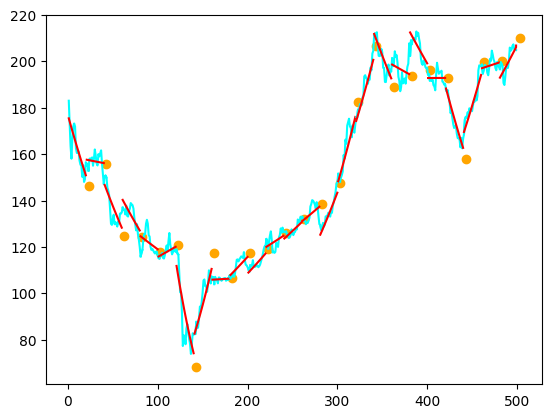

In [369]:
# predictor.add_excluded_type(Regression.RegressionType.Linear)
# predictor.add_excluded_type(Regression.RegressionType.Exponential)
# predictor.add_excluded_type(Regression.RegressionType.Power)
# predictor.add_excluded_type(Regression.RegressionType.Quadratic)

for i in range(0, len(test_data), step):
    predictor.predict(i, i + step, prediction_distance)
    if regression_type is not None:
        predictor.regression_type = regression_type
        predictor.update_regression_func()
    
    print(f"Point: {i}, {predictor.regression_type}")
    Expremo.plot_prediction(predictor, prediction_distance)